In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import itertools as itt
import math

## Propiedad reproductiva de la Normal

# Varianza conocida

*Generamos puntos random con una distribución normal:*

In [3]:
X = stats.norm.rvs(loc=0., scale=5., size=100)

In [4]:
X.mean()

-0.3550832560280917

*Ahora muchas veces!*

In [5]:
Nexperiments = 50

mu = 0.
sd = 5.
n = 100

means = []
for _ in range(Nexperiments):
    X = stats.norm.rvs(loc=mu, scale=sd, size=n)
    means.append(X.mean())

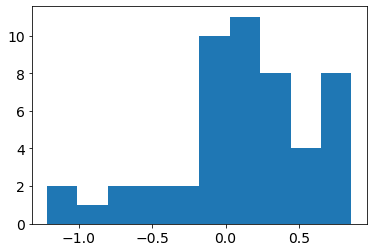

In [6]:
plt.hist(means)
plt.show()

y ahora MAS veces!

In [7]:
Nexperiments = 500

mu = 0.
sd = 5.
n = 100

means = []
for _ in range(Nexperiments):
    X = stats.norm.rvs(loc=mu, scale=sd, size=n)
    means.append(X.mean())

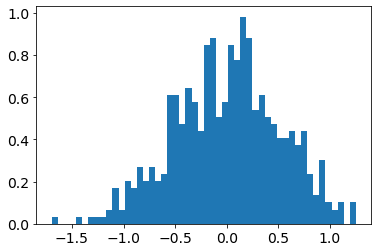

In [9]:
plt.hist(means, bins=50, density=True)
plt.show()

Comparación con la teoría:

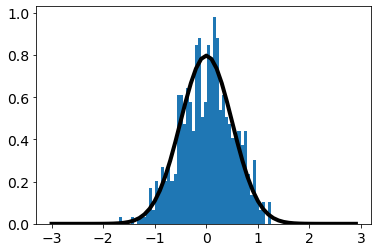

In [16]:
x = np.arange(-3, 3, 0.1)
sd_avg = sd/np.sqrt(n)
f = stats.norm(loc=mu, scale=sd_avg)
y = f.pdf(x)

plt.hist(means, bins=50, density=True)
plt.plot(x, y, 'k-', linewidth=4)
plt.show()

# BOOTSTRAP

#### Sorteo una muestra de randoms y quiero estimar la media y el error estándar de la estimación de la media con bootstrap

In [135]:
mu = np.pi
sd = 3.
Nsample = 5

X = stats.norm.rvs(loc=mu, scale=sd, size=Nsample)

In [136]:
X

array([2.4597934 , 3.61854043, 5.23719504, 8.81861407, 2.48778853])

#### ...pero hacerlo para n más grande requiere mucho tiempo de cómputo
#### WARNING!  Si se corren las celdas que siguen con Nsample grande (aprox. > 8) se cuelga la laptop!

In [137]:
L = list(itt.combinations_with_replacement(range(Nsample),Nsample))
len(L)

126

... el numero de combinaciones con repetición y sin orden:

In [138]:
math.factorial(2*Nsample-1)/math.factorial(Nsample)/math.factorial(Nsample-1)

126.0

Ahora hacemos la cuenta con TODAS las combinaciones posibles (Cuidado!  que Nsample sea chico):

In [139]:
#print L[2342]
#print X[list(L[2342])]

In [140]:
means = []

for i in list(itt.combinations_with_replacement(range(Nsample),Nsample)):
    S = X[list(i)]
    means.append(S.mean())

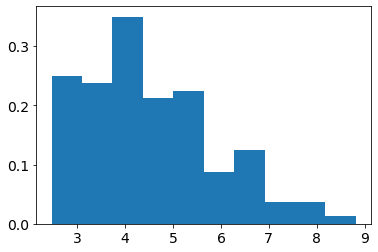

In [141]:
plt.hist(means,  density=True)
plt.show()

In [142]:
print(np.std(means))

1.370628067953805


In [143]:
print(sd/np.sqrt(Nsample))

1.3416407864998738


In [153]:
mu = np.pi
sd = 3.
Nsample = 5

Nexperiments = 20

for k in range(Nexperiments):
    X = stats.norm.rvs(loc=mu, scale=sd, size=Nsample)
    means = []

    for i in list(itt.combinations_with_replacement(range(Nsample),Nsample)):
        S = X[list(i)]
        means.append(S.mean())
    print(sd/np.sqrt(Nsample), np.std(means))

1.3416407864998738 0.394108282056054
1.3416407864998738 1.0308650995530784
1.3416407864998738 1.20240014187365
1.3416407864998738 1.4607424809043388
1.3416407864998738 1.4663367054263998
1.3416407864998738 1.920687923170692
1.3416407864998738 2.0409276315521963
1.3416407864998738 0.9084687185861591
1.3416407864998738 0.6771424384501006
1.3416407864998738 1.1111188709095476
1.3416407864998738 1.0281557380205955
1.3416407864998738 0.7812447984049156
1.3416407864998738 1.823492767087927
1.3416407864998738 1.362674805340726
1.3416407864998738 0.3987381263448771
1.3416407864998738 2.2228821958332676
1.3416407864998738 0.6279913736389674
1.3416407864998738 0.9055300059240096
1.3416407864998738 2.227598858311255
1.3416407864998738 1.5800681112402977


y ahora hacemos la estimación de la "media" con randoms (MonteCarlo):

In [154]:
means_B = []
Nboot = 100

for i in range(Nboot):
    l = np.random.choice(Nsample, size=Nsample)
    S = X[list(l)]
    means_B.append(S.mean())

In [155]:
np.random.choice(Nsample, size=Nsample)

array([1, 2, 1, 4, 3])

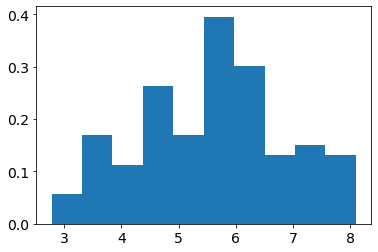

In [156]:
plt.hist(means_B, density=True)
plt.show()

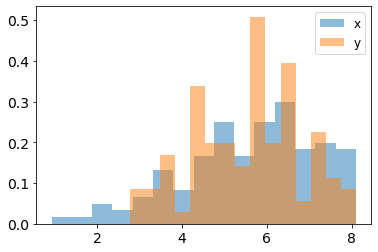

In [157]:
plt.hist(means, bins=15, alpha=0.5, density=True, label='x')
plt.hist(means_B, bins=15, alpha=0.5, density=True, label='y')
plt.legend(loc='upper right')
plt.show()

### Cuando la muestra es más grande, sólo se puede hacer la estimación...

In [158]:
Nsample = 12

In [159]:
mu = 12.
sd = 3.

X = stats.norm.rvs(loc=mu, scale=sd, size=Nsample)

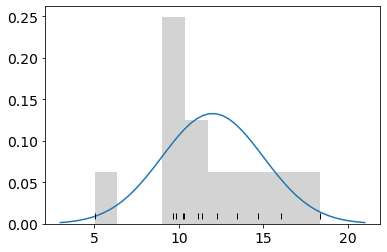

In [161]:
s = np.linspace(mu-3*sd, mu+3*sd)
f = stats.norm.pdf(s, mu, sd)
plt.plot(s, f)
plt.hist(X, density=True, color='lightgray')
plt.plot(X, [0.01]*len(X), '|', color='k')
plt.show()

In [162]:
means_B = []
Nboot = 500

for i in range(Nboot):
    l = np.random.choice(Nsample, size=Nsample)
    S = X[list(l)]
    means_B.append(S.mean())

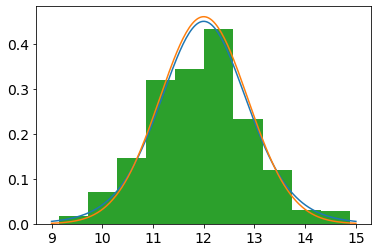

In [164]:
s = np.linspace(mu-sd, mu+sd, num=200)
f = stats.t.pdf(s, df=Nsample-1, loc=mu, scale=sd/math.sqrt(Nsample))
f2 = stats.norm.pdf(s, loc=mu, scale=sd/math.sqrt(Nsample))

plt.plot(s, f)
plt.plot(s, f2)
plt.hist(means_B,  density=True)
plt.show()